In [1]:
from transformers import AutoTokenizer

c:\Users\aadhi\Desktop\University 4th Year\Statistical NLP\SNLP_Project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tokenizer = AutoTokenizer.from_pretrained("yaofu/Llama-2-7b-80k")

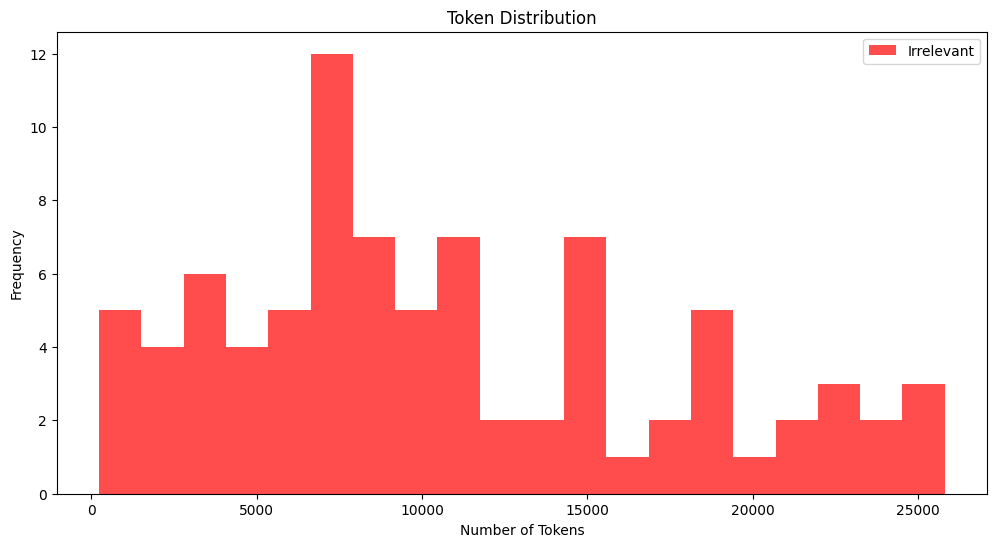

In [ ]:
import os
from collections import Counter

import matplotlib.pyplot as plt

# Function to tokenize and count tokens in files within a directory
def tokenize_and_count(directory):
    token_counts = []
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        if os.path.isfile(filepath):
            with open(filepath, 'r', encoding='utf-8') as file:
                text = file.read()
                tokens = tokenizer.tokenize(text)
                token_counts.append(len(tokens))
    return token_counts

# Tokenize and count tokens for irrelevant and relevant directories
irrelevant_dir = '../haystack/irrelevant'
relevant_dir = '../haystack/relevant'

irrelevant_token_counts = tokenize_and_count(irrelevant_dir)
relevant_token_counts = tokenize_and_count(relevant_dir)

# # Plot the distribution of tokens
# plt.figure(figsize=(12, 6))

# plt.hist(irrelevant_token_counts, bins=20, alpha=0.7, label='Irrelevant', color='red')

# plt.title('Token Distribution')
# plt.xlabel('Number of Tokens')
# plt.ylabel('Frequency')
# plt.legend()
# plt.show()

In [24]:
# Function to tokenize and count tokens in files within a directory, returning file names as well
def tokenize_and_count_with_filenames(directory):
    token_counts = []
    file_names = []
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        if os.path.isfile(filepath):
            with open(filepath, 'r', encoding='utf-8') as file:
                text = file.read()
                tokens = tokenizer.tokenize(text)
                token_counts.append(len(tokens))
                file_names.append(filename)
    return token_counts, file_names

# Get token counts and file names for irrelevant and relevant directories
irrelevant_token_counts, irrelevant_file_names = tokenize_and_count_with_filenames(irrelevant_dir)
print(len(irrelevant_token_counts))
relevant_token_counts, relevant_file_names = tokenize_and_count_with_filenames(relevant_dir)
print(len(relevant_token_counts))

# Get file names with less than 5000 tokens
irrelevant_files_under_5000 = [irrelevant_file_names[i] for i, count in enumerate(irrelevant_token_counts) if count < 5000]
relevant_files_under_5000 = [relevant_file_names[i] for i, count in enumerate(relevant_token_counts) if count < 5000]

print("Irrelevant files with less than 5000 tokens:", irrelevant_files_under_5000)
print("Relevant files with less than 5000 tokens:", relevant_files_under_5000)

85
85
Irrelevant files with less than 5000 tokens: ['157.txt', '166.txt', '184.txt', '187.txt', '199.txt', '384.txt', '396.txt', '408.txt', '409.txt', '410.txt', '424.txt', '436.txt', '446.txt', '536.txt', '580.txt', '587.txt', '589.txt']
Relevant files with less than 5000 tokens: ['121.txt', '124.txt', '156.txt', '162.txt', '165.txt', '170.txt', '180.txt', '183.txt', '184.txt', '187.txt', '199.txt', '377.txt', '396.txt', '402.txt', '403.txt', '409.txt', '43.txt', '452.txt', '578.txt', '580.txt']


In [25]:
len(set(irrelevant_files_under_5000).union(set(relevant_files_under_5000)))

31

In [17]:
len(irrelevant_files_under_5000), len(relevant_files_under_5000)

(6, 9)